                                              Team 13 Final Project

## Project Overview
The focus of this project is to examine the validity of the Quantity Theory of Money, a fundamental macroeconomic model for predicting the inflation rate. According to the theory, there should be a positive relationship between money supply (M2) and price level (CPI). In this project, real-world data like CPI, GDP, and M2 from the past 20 years will be explored to test the relationship between these variable data using linear regression analysis. 

## Group Project Structure
The project will begin with a data report provided, which will explain the origin of the data and how to access the data.

The second part of the project will provide summary statistics about M2, CPI, GDP, Velocity of M2, and visualizations of these statistics to help further illustrate the project.

The third part of the project will state a hypothesis based on the Quantity Theory of Money. Then, the project will conduct a linear regression on two periods of time (1960-1980 and 1999-2019). For the data from 1960 to 1980 in which the velocity of M2 was relatively constant, the project will test the hypothesis to study whether the model predicts a positive relationship between M2 and CPI in the real world; for the data from 1999 to 2019 in which the velocity of M2 dropped significantly, the project will examine the impact of the velocity of M2 on the model. 

Lastly, there will be a detailed discussion of the results and how it follows or goes against the model. 

## Data Report:
The data for this project comes from the Federal Reserve Economic Data website (FRED). FRED provides data on the U.S. CPI (where we will compute the inflation rate), M2, GDP, Velocity of M2 (it will serve as a control variable in our analysis) from 1960 to 1980 and from 1999 to 2019. The data can be accessed at https://fred.stlouisfed.org.

## Key variables: 

The four key variables in this project are M2, CPI, GDP, and Velocity of M2. 

M2 includes a broader set of financial assets held principally by households. M2 consists of M1 plus: (1) savings deposits (which include money market deposit accounts, or MMDAs); (2) small-denomination time deposits (time deposits in amounts of less than $100,000); and (3) balances in retail money market mutual funds (MMMFs). 

The Consumer Price Index (CPI) is a measure of the average change in the price of a basket of consumer goods and services and helps measure price inflation for consumers.

Gross Domestic Product (GDP) is the total value of goods and services produced in a country annually.

The velocity of M2 is the frequency at which one unit of currency is used to purchase domestically- produced goods and services within a given time period. In other words, it is the number of times one dollar is spent to buy goods and services per unit of time. If the velocity of money is increasing, then more transactions are occurring between individuals in an economy.


In [4]:
#Key Imports
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import statsmodels.api as sm
from statsmodels.iolib.summary2 import summary_col

In [9]:
#Access Data
url = 'https://fred.stlouisfed.org/graph/fredgraph.csv?bgcolor=%23e1e9f0&chart_type=line&drp=0&fo=open%20sans&graph_bgcolor=%23ffffff&height=450&mode=fred&recession_bars=on&txtcolor=%23444444&ts=12&tts=12&width=1168&nt=0&thu=0&trc=0&show_legend=yes&show_axis_titles=yes&show_tooltip=yes&id=GDPCA&scale=left&cosd=1960-01-01&coed=2019-01-01&line_color=%234572a7&link_values=false&line_style=solid&mark_type=none&mw=3&lw=2&ost=-99999&oet=99999&mma=0&fml=a&fq=Annual&fam=avg&fgst=lin&fgsnd=2019-01-01&line_index=1&transformation=lin&vintage_date=2020-11-03&revision_date=2020-11-03&nd=1929-01-01'
data = pd.read_csv(url, parse_dates=True)
data.head()

,DATE,GDPCA
0,1960-01-01,3259.971
1,1961-01-01,3343.546
2,1962-01-01,3548.409
3,1963-01-01,3702.944
4,1964-01-01,3916.280


In [17]:
#Rename the USGDP
data.columns=['DATE','US_GDP'] 
data.head()

,DATE,US_GDP
0,1960-01-01,3259.971
1,1961-01-01,3343.546
2,1962-01-01,3548.409
3,1963-01-01,3702.944
4,1964-01-01,3916.280


In [18]:
#Summary Statistics for Unemployment Rate
data.describe()

,US_GDP
count,60.000000
mean,10002.882083
std,4782.658931
min,3259.971000
25%,5679.521500
50%,9273.744500
75%,14532.913750
max,19091.662000


/Users/bbling/opt/anaconda3/lib/python3.8/site-packages/pandas/plotting/_matplotlib/core.py:1235: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(xticklabels)


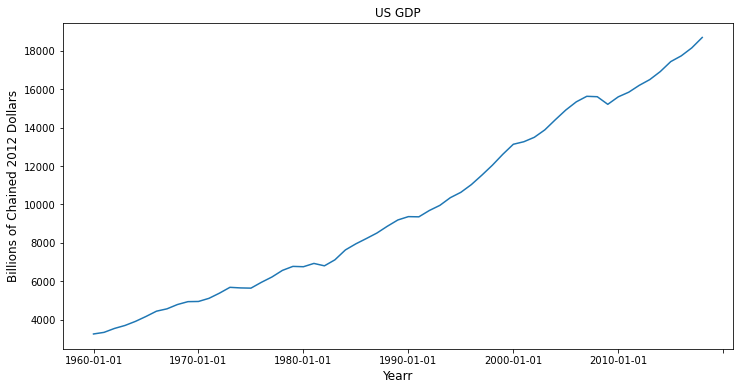

In [26]:
#Graphing the US_GDP
data1=data.set_index('DATE')
ax = data1['1960':'2019'].plot(title='US GDP', legend=False, figsize=(12,6))
ax.set_xlabel('Year''r', fontsize=12,)
ax.set_ylabel('Billions of Chained 2012 Dollars', fontsize=12)
plt.show()